### Trend Analysis of Historical Mean Temperature Data in Malawi (1950-2014)

-    ### The analysis includes visualization, linear regression, Mann-Kendall trend test, and future predictions
-    ### The predicted outputs are later compared to the CMIP6 MIROC6 model outputs for future annual mean temperature

In [256]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pymannkendall as mk


In [257]:
#Read Data
temp_data = pd.read_csv('../data/processed/mean_historical_temp_clean.csv')

#Turn temp_data into a DataFrame

temp_data = pd.DataFrame(temp_data)

#Display first few rows of the dataset
temp_data.head()


,code,name,date,temp_mean,temp_outlier
0,MWI,Malawi,1950-07-01,22.20,False
1,MWI,Malawi,1951-07-01,21.43,False
2,MWI,Malawi,1952-07-01,21.66,False
3,MWI,Malawi,1953-07-01,21.33,False
4,MWI,Malawi,1954-07-01,21.64,False


In [258]:
# Check data types and information
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   code          65 non-null     object 
 1   name          65 non-null     object 
 2   date          65 non-null     object 
 3   temp_mean     65 non-null     float64
 4   temp_outlier  65 non-null     bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 2.2+ KB


In [259]:
# Extract Only Year and Temperature Columns
temp_data_new = temp_data[['date', 'temp_mean']]

# Convert 'date' column to datetime format and only keep the year
temp_data_new = temp_data_new.copy()  
temp_data_new['date'] = pd.to_datetime(temp_data_new['date'])
temp_data_new['year'] = temp_data_new['date'].dt.year
temp_data_new = temp_data_new[['year', 'temp_mean']]
temp_data_new.head()

,year,temp_mean
0,1950,22.20
1,1951,21.43
2,1952,21.66
3,1953,21.33
4,1954,21.64


In [260]:
#Set index column to start from 1 and rename columns
temp_data_new.rename(columns={'temp_mean': 'Mean_Temperature'}, inplace=True)
temp_data_new.rename(columns={'year': 'Year'}, inplace=True)
temp_data_new.head()

,Year,Mean_Temperature
0,1950,22.20
1,1951,21.43
2,1952,21.66
3,1953,21.33
4,1954,21.64


In [261]:
# Overview of the cleaned data
temp_data_new.info()
temp_data_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              65 non-null     int32  
 1   Mean_Temperature  65 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 912.0 bytes


,Year,Mean_Temperature
count,65.00000,65.000000
mean,1982.00000,21.962308
std,18.90767,0.465265
min,1950.00000,21.180000
25%,1966.00000,21.610000
50%,1982.00000,21.890000
75%,1998.00000,22.270000
max,2014.00000,23.160000


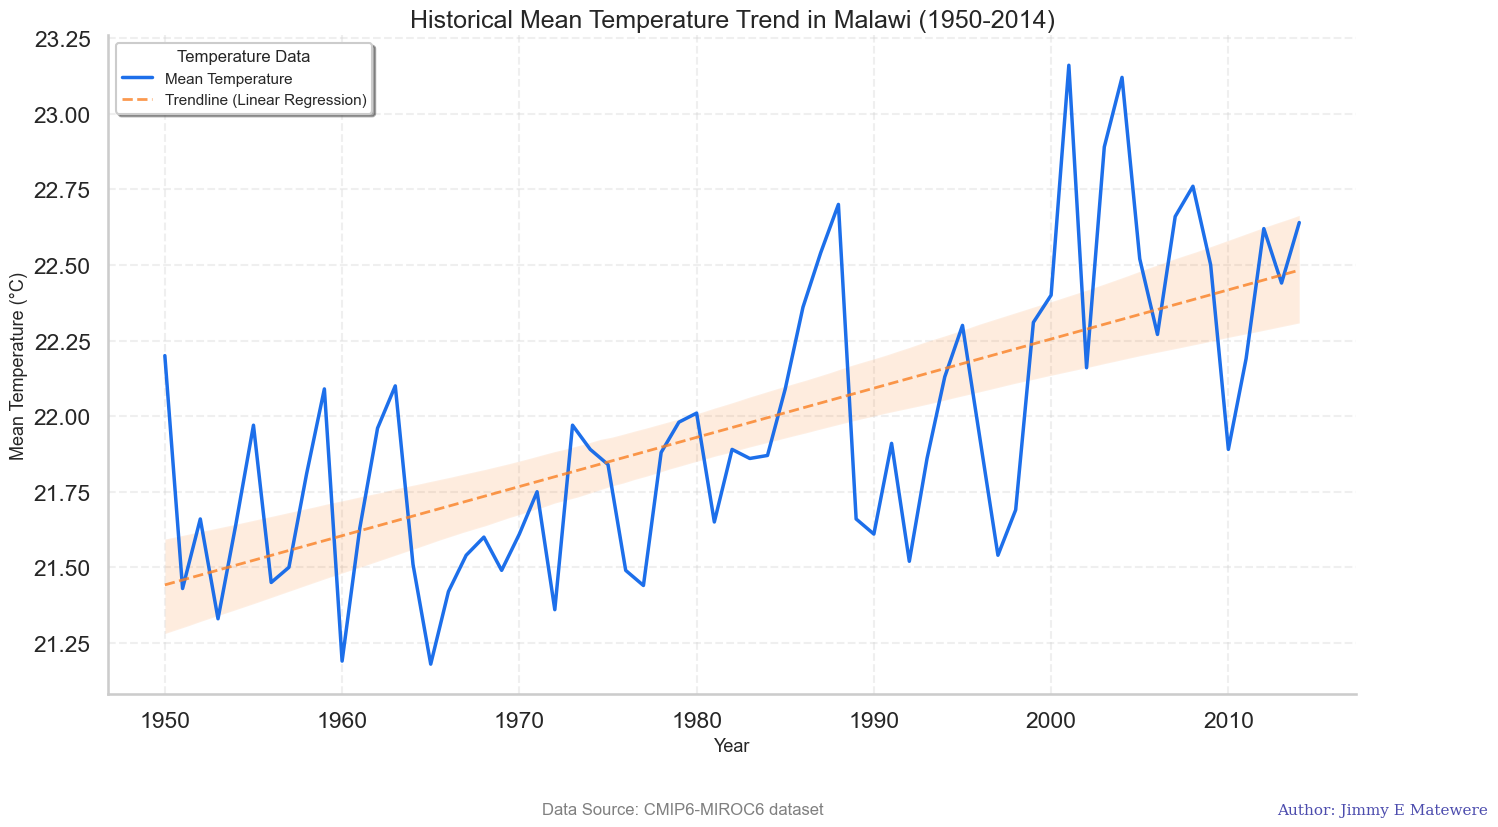

In [262]:
# Visualize Historical Mean Temperature Trend in Malawi (1950-2014)

sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(14, 8))

#Plot the data with regression line
sns.lineplot(data=temp_data_new, x='Year', y='Mean_Temperature', color ="#0963e9eb", linewidth=2.5, label = 'Mean Temperature ')
sns.regplot(data=temp_data_new, x='Year', y='Mean_Temperature', scatter=False, color="#fa8023", 
            line_kws={"linewidth": 2, "linestyle": "--", "alpha": 0.8}, label = 'Trendline (Linear Regression)') 

plt.title('Historical Mean Temperature Trend in Malawi (1950-2014)')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Mean Temperature (°C)', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.figtext(0.5, -0.04,
    'Data Source: CMIP6-MIROC6 dataset', 
    ha='center', fontsize=12, color='gray' )
plt.figtext(1, -0.04,"Author: Jimmy E Matewere", fontsize=11, ha='center', alpha=0.7,
             color='darkblue', rotation=0, fontfamily='serif')

plt.legend( title='Temperature Data', title_fontsize=12,
    fontsize=11, loc='upper left', frameon=True, fancybox=True, shadow=True)

plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


In [263]:
# Linear Regression Analysis
X = sm.add_constant(temp_data_new['Year'])  # adding a constant
model = sm.OLS(temp_data_new['Mean_Temperature'], X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Mean_Temperature   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     48.81
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.11e-09
Time:                        14:33:59   Log-Likelihood:                -23.347
No. Observations:                  65   AIC:                             50.69
Df Residuals:                      63   BIC:                             55.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2625      4.612     -2.225      0.0

<>:9: SyntaxWarning: invalid escape sequence '\)'
<>:9: SyntaxWarning: invalid escape sequence '\)'
C:\Users\Dell Celestial\AppData\Local\Temp\ipykernel_9992\3595464229.py:9: SyntaxWarning: invalid escape sequence '\)'
  plt.title('Linear Regression of Mean Annual \nSurface Temperature in Malawi Over 65 Years\n(1950-2014\)',


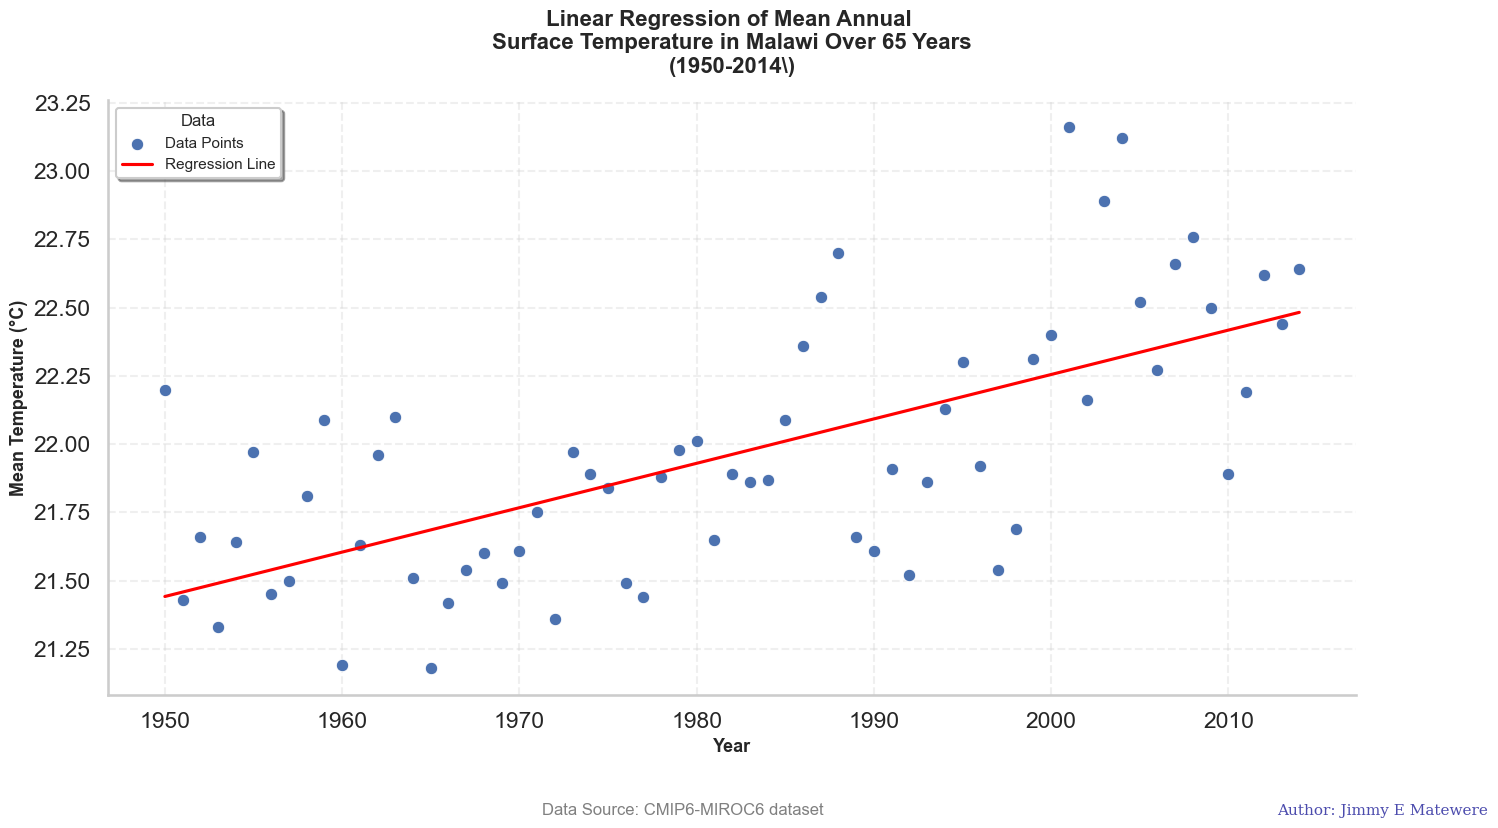

In [264]:
sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(14, 8))

# Plotting the linear regression line
sns.scatterplot(data=temp_data_new, x='Year', y='Mean_Temperature', label='Data Points')


plt.plot(temp_data_new['Year'], predictions, color='red', label='Regression Line')
plt.title('Linear Regression of Mean Annual \nSurface Temperature in Malawi Over 65 Years\n(1950-2014\)',
           fontsize=16, weight='bold', pad=20)
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Mean Temperature (°C)', fontsize=13, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')
plt.figtext(0.5, -0.04,
    'Data Source: CMIP6-MIROC6 dataset', 
    ha='center', fontsize=12, color='gray' )
plt.figtext(1, -0.04,"Author: Jimmy E Matewere", fontsize=11, ha='center', alpha=0.7,
             color='darkblue', rotation=0, fontfamily='serif')
plt.legend( title='Data', title_fontsize=12,
    fontsize=11, loc='upper left', frameon=True, fancybox=True, shadow=True)

plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


In [265]:
# Mann-Kendall Trend Test
mk_result = mk.original_test(temp_data_new['Mean_Temperature'])
print(mk_result)


Mann_Kendall_Test(trend='increasing', h=True, p=3.374705648262477e-08, z=5.520794347658511, Tau=0.46923076923076923, s=976.0, var_s=31189.333333333332, slope=0.01652173913043474, intercept=21.36130434782609)


    Year  Predicted_Mean_Temperature
0   2015                   22.498846
1   2016                   22.515105
2   2017                   22.531364
3   2018                   22.547622
4   2019                   22.563881
5   2020                   22.580140
6   2021                   22.596399
7   2022                   22.612657
8   2023                   22.628916
9   2024                   22.645175
10  2025                   22.661434
11  2026                   22.677692
12  2027                   22.693951
13  2028                   22.710210
14  2029                   22.726469


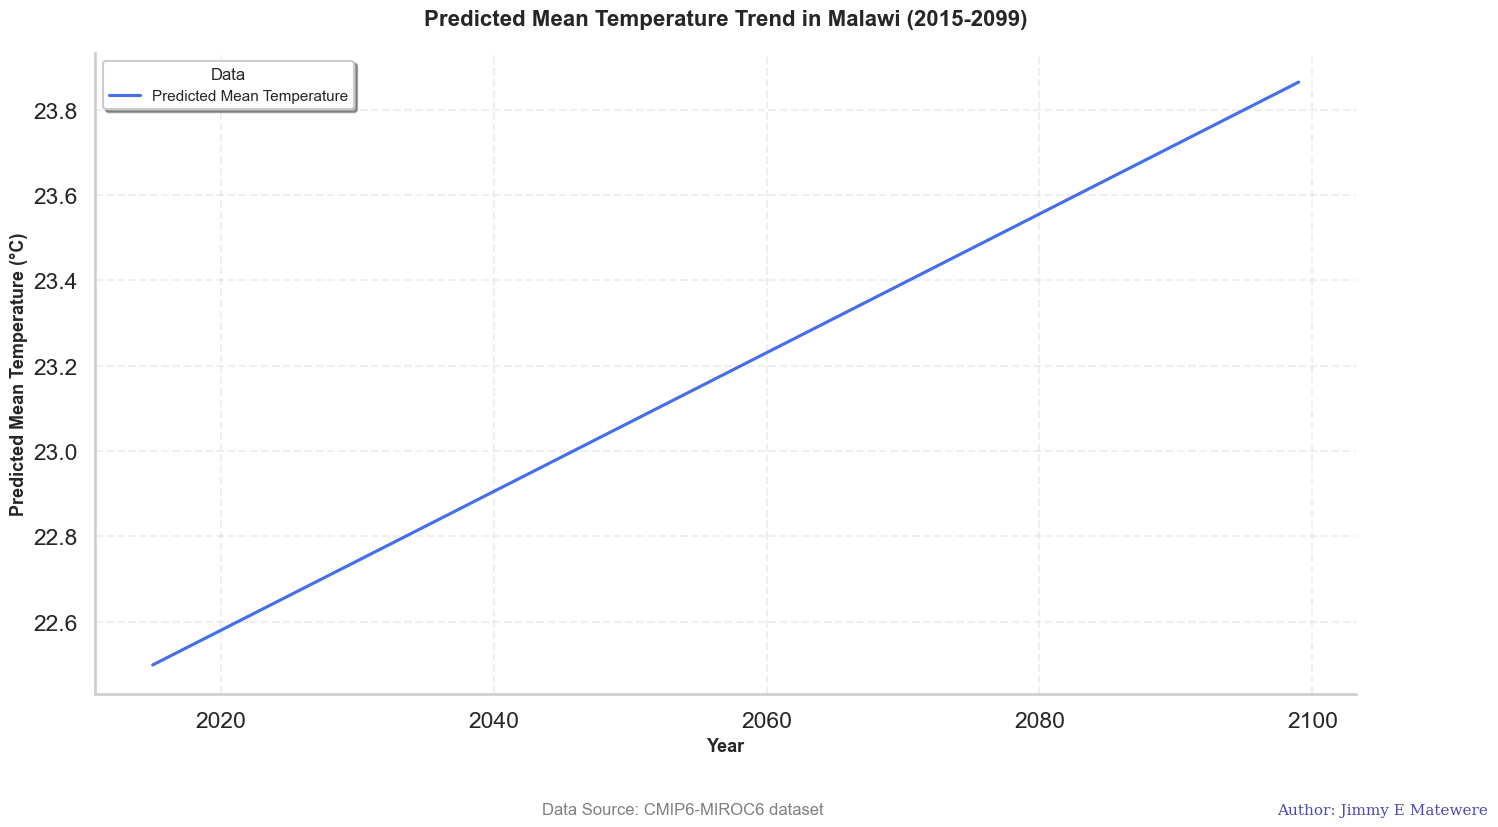

In [271]:
# Predictive Analysis from Linear Regression Model

future_years = pd.DataFrame({'Year': np.arange(2015, 2100)})
future_years = sm.add_constant(future_years)    
future_predictions = model.predict(future_years)
future_predictions_df = pd.DataFrame({'Year': future_years['Year'], 'Predicted_Mean_Temperature': future_predictions})
print(future_predictions_df.head(15))

# Plotting Future Predictions
plt.figure(figsize=(14, 8))
sns.lineplot(data=future_predictions_df, x='Year', y='Predicted_Mean_Temperature', color= "#1b4ee8d1", label='Predicted Mean Temperature')
plt.title('Predicted Mean Temperature Trend in Malawi (2015-2099)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Mean Temperature (°C)', fontsize=13, fontweight='bold')

plt.ticklabel_format(style='plain', axis='y')
plt.figtext(0.5, -0.04,
    'Data Source: CMIP6-MIROC6 dataset', 
    ha='center', fontsize=12, color='gray' )
plt.figtext(1, -0.04,"Author: Jimmy E Matewere", fontsize=11, ha='center', alpha=0.7,
             color='darkblue', rotation=0, fontfamily='serif')
plt.legend( title='Data', title_fontsize=12,
    fontsize=11, loc='upper left', frameon=True, fancybox=True, shadow=True)

plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


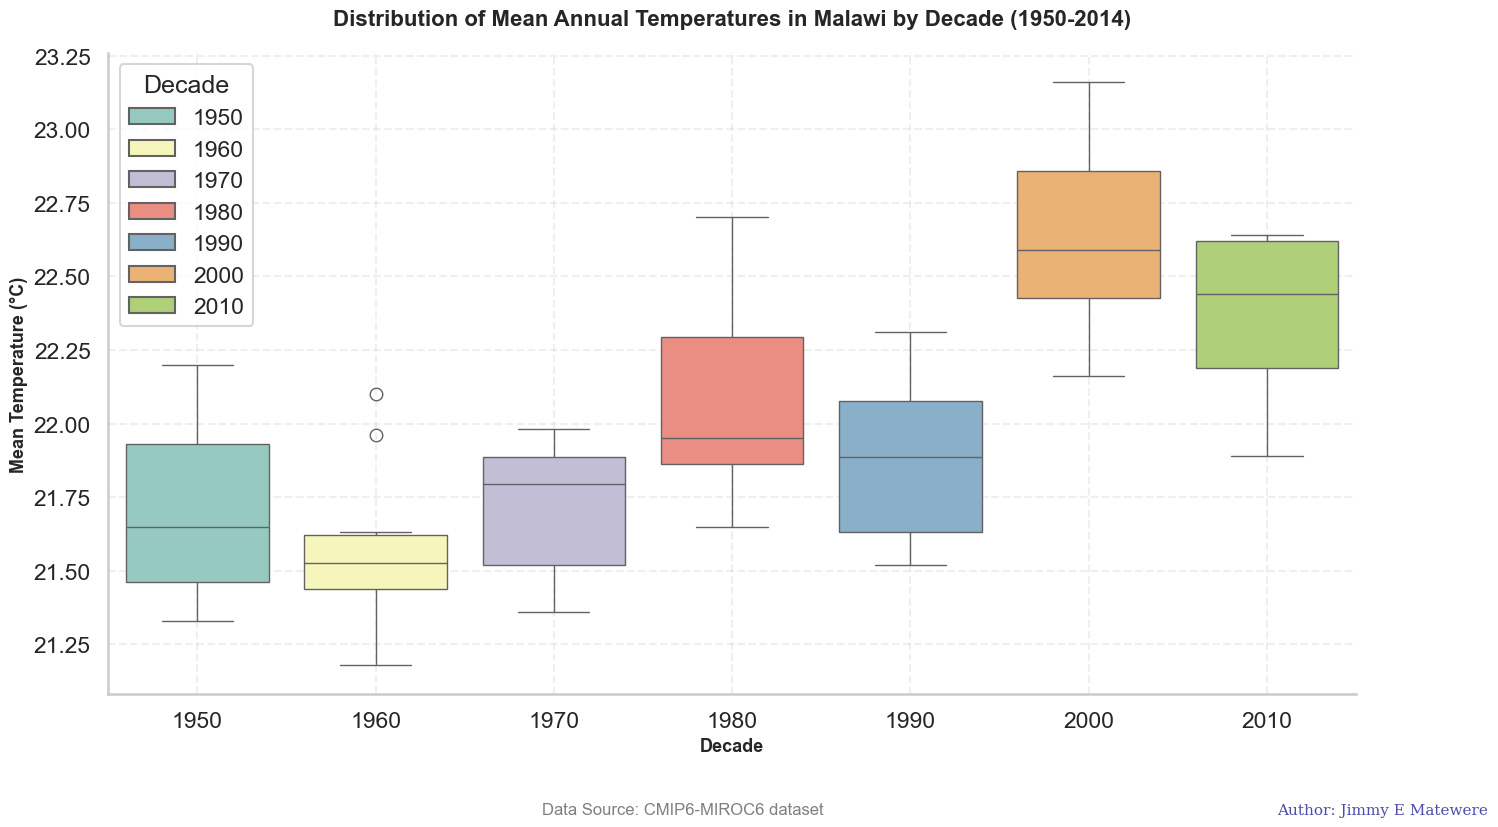

In [294]:
# Box Plot by decade to visualize temperature distribution
plt.figure(figsize=(14, 8))
temp_data_new['Decade'] = (temp_data_new['Year'] // 10 * 10)

sns.boxplot(x='Decade', y='Mean_Temperature', data=temp_data_new, palette="Set3", hue='Decade')
plt.title('Distribution of Mean Annual Temperatures in Malawi by Decade (1950-2014)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Decade', fontsize=13, fontweight='bold')
plt.ylabel('Mean Temperature (°C)', fontsize=13, fontweight='bold')
plt.figtext(0.5, -0.04,
    'Data Source: CMIP6-MIROC6 dataset', 
    ha='center', fontsize=12, color='gray' )
plt.figtext(1, -0.04,"Author: Jimmy E Matewere", fontsize=11, ha='center', alpha=0.7,
             color='darkblue', rotation=0, fontfamily='serif')
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()  


In [267]:
#Export Future Predictions to CSV
future_predictions_df.to_csv('../data/processed/predicted_mean_temperature_2015_2099.csv', index=False)